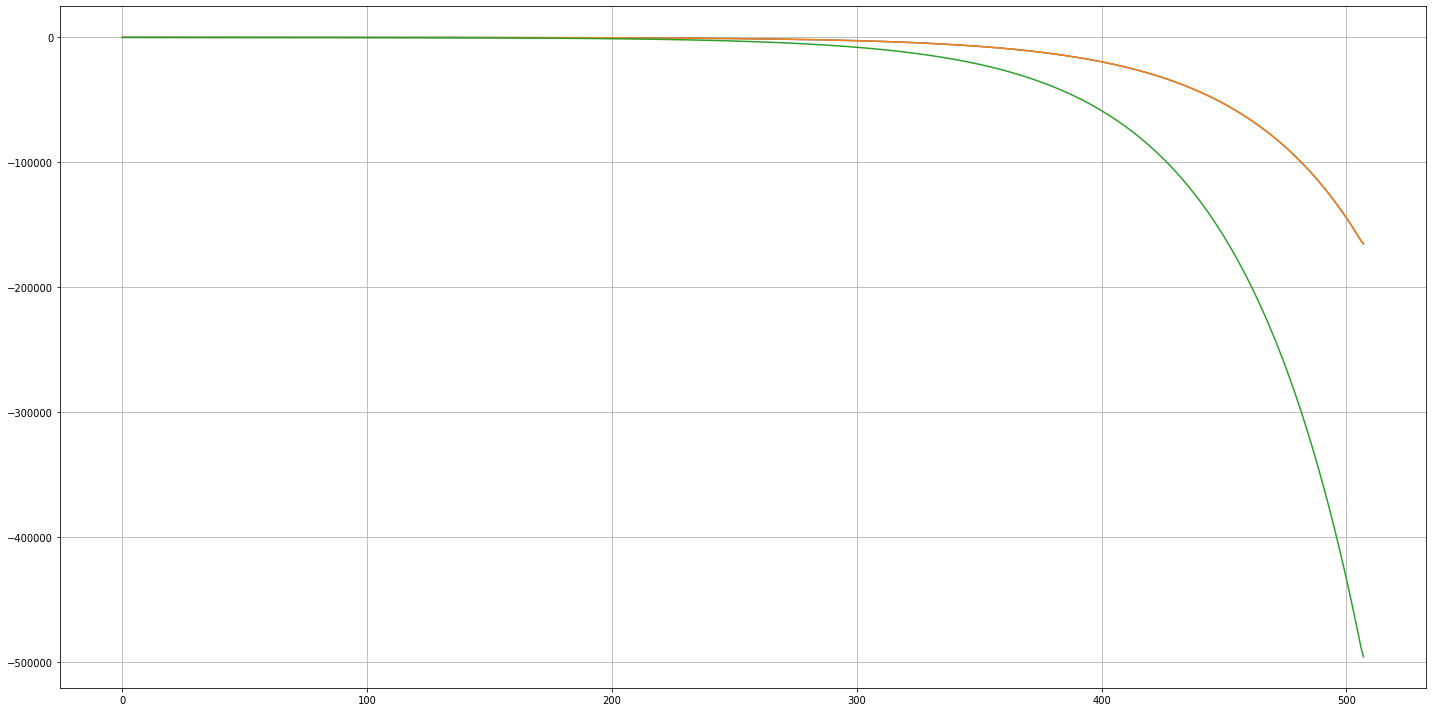

In [ ]:

import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# from OperationalAmplifier import basic_comparator


circuit = Circuit('Astable Multivibrator')

source = circuit.V('cc', 'vcc', circuit.gnd, 15@u_V)
# Time constant
circuit.R(1, 'output', 'comparator', 1@u_kΩ)
circuit.C(1, 'comparator', circuit.gnd, 100@u_nF)
# Reference
circuit.R(2, 'output', 'reference', 100@u_kΩ)
circuit.R(3, 'vcc', 'reference', 100@u_kΩ)
circuit.R(4, 'reference', circuit.gnd, 100@u_kΩ)
# Comparator
# Fixme: ngspice is buggy with such subcircuit
# circuit.subcircuit(basic_comparator)
# circuit.X('comparator', 'BasicComparator', 'reference', 'comparator', 'vcc', circuit.gnd, 'output')
circuit.NonLinearVoltageSource(1, 'output', circuit.gnd,
                               expression='V(reference, comparator)',
                               table=((-micro(1), 0),
                                      (micro(1), source.dc_value))
                               )

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
simulator.initial_condition(comparator=0)  # Fixme: simulator.nodes.comparator == 0
analysis = simulator.transient(step_time=1@u_us, end_time=500@u_us)
# Fixme: Xyce fails with Time step too small

figure, ax = plt.subplots(figsize=(20, 10))
ax.grid()
ax.plot(analysis.reference)
ax.plot(analysis.comparator)
ax.plot(analysis.output)

plt.tight_layout()

